# Social Dilemma Twitter Sentimental Analysis using RNN

The Social Dilemma, a documentary-drama hybrid explores the dangerous human impact of social networking, with tech experts sounding the alarm on their own creations as the tech experts sound the alarm on the dangerous human impact of social networking. This dataset brings you the twitter responses made with the #TheSocialDilemma hashtag after watching the eye-opening documentary "The Social Dilemma" released in an OTT platform(Netflix) on September 9th, 2020. You can categorize the tweets into different groups to identify the sentiment of the users regarding the documentary.

**Goal:** You are hired as a deep learning engineer and you are asked to categorize the tweets into three categories.<br>

**Constraints:** You should be using only RNN to generate results and should not be using any LSTM or ML classification models to generate results.<br>

**Data Description:** The dataset was extracted using TwitterAPI, consisting of nearly 20000 tweets from twitter users all over the globe!<br>
1. Attribute Information:
2. user_name - The name of the user, as they’ve defined it.
3. user_location - The user-defined location for this account’s profile.
4. user_description - The user-defined UTF-8 string describing their account.
5. user_created - Time and date, when the account was created.
6. user_followers - The number of followers an account currently has.
7. user_friends – The number of friends an account currently has.
8. user_favourites - The number of favorites an account currently has.
9. user_verified - When true, indicates that the user has a verified account.
10. date - UTC time and date when the Tweet was created.
11. hashtags - All the other hashtags posted in the tweet along with #TheSocialDilemma
12. source - Utility used to post the Tweet, Tweets from the Twitter website have a source value – web
13. is_retweet - Indicates whether this Tweet has been Retweeted by the authenticating user.
14. clean_text – Cleaned text of the tweet.
15. Sentiment (target) - Indicates the sentiment of the tweet, consists of three categories: Positive, neutral, and negative.
## Provided Files:
**Train_data** - Should be used to feed your model.<br>
**Test_data** - Should be used only to generate predictions.<br>
## Evaluation Criteria:
The evaluation metric for this problem statement is the validation Accuracy Score.

In [1]:
# importing required libraries
import io
import os
import numpy as np # import linear algebra
import pandas as pd # import I/O files, data preprocessing
# import NLP libraries
import nltk
import re
# data visuzalization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%cd "D:\Imarticus\Deep Learning\DL + AI Exam Paper\Dataset\RNN"

D:\Imarticus\Deep Learning\DL + AI Exam Paper\Dataset\RNN


In [3]:
tweets_train=pd.read_csv('tweets_train.csv') # importing train file

In [4]:
tweets_test=pd.read_csv('tweets_test.csv') # importing test file

In [5]:
tweets_train.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,clean_text,Sentiment
0,Romy 👑,Bolton - England,"Tables turn, bridges burn, you live and learn.",2009-06-15 09:00:39,525,896,3854,False,2020-09-19 15:19:32,['TheSocialDilemma'],Twitter for Android,False,TheSocialDilemma is an eye opener isn t it ple...,Neutral
1,TLynn Peterson,"Black Canyon City, Arizona",Acquired disability ♿ after an accident. Livin...,2013-05-29 00:17:46,5045,5374,48152,False,2020-09-13 00:31:46,['TheSocialDilemma'],Twitter for Android,False,TheSocialDilemma If we don t agree on what is ...,Positive
2,Rutger Kosters,Netherlands,Cloud Solution Architect @NetApp | VCDX #209 |...,2014-10-07 09:34:10,574,251,1070,False,2020-09-09 21:10:33,['TheSocialDilemma'],Twitter for Android,False,Watching TheSocialDilemma scary to see social ...,Negative
3,IDFWU🗯🇿🇼🇿🇦,"East London, South Africa","YOU HAVE OPTIONS, YOU CAN’T JUST TAKE WHAT LIF...",2012-08-22 11:09:06,706,618,1320,False,2020-09-11 04:33:08,NaN,Twitter for Android,False,You check your social media before you pee in ...,Positive
4,Treebel,NaN,NaN,2010-09-25 07:25:31,9,13,55,False,2020-09-17 16:27:38,['thesocialdilemma'],Twitter for iPhone,False,watch thesocialdilemma and see what s actually...,Negative


In [6]:
tweets_train.tail()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,clean_text,Sentiment
16995,Ra'Chelle Rogers,Philadelphia/New York,mom. media. art. Publicist. Philly. Opinions e...,2009-05-22 13:34:14,387,400,1274,False,2020-09-13 22:12:29,['TheSocialDilemma'],Twitter for iPhone,False,Watching TheSocialDilemma,Neutral
16996,Mike Lynch,"Boston, MA, USA",higher education professional . educator . doc...,2009-04-27 01:16:09,4444,4995,52692,False,2020-09-20 15:17:14,['TheSocialDilemma'],Twitter for iPhone,False,If you re not paying for the product you are t...,Neutral
16997,James Baldwin was a genius.,"Terra-Belle, USA",Class based policies won't fix the racial weal...,2012-10-05 23:27:21,879,1456,50103,False,2020-09-19 14:04:32,['TheSocialDilemma'],Twitter Web App,False,Watching TheSocialDilemma Let s see,Neutral
16998,Johan - SocialMediaBreakup,"Dublin City, Ireland",Helping people to beat their compulsive phone ...,2018-10-25 22:21:17,1009,1283,19290,False,2020-09-18 15:37:00,['TheSocialDilemma'],TweetDeck,False,Yes TheSocialDilemma what a perfect time to be...,Positive
16999,attilacsordas,"Cambridge, UK",healthy longevity startupper/biologist/philoso...,2007-03-27 09:26:42,4278,558,3844,False,2020-09-19 18:51:11,['TheSocialDilemma'],Twitter Web App,False,had the impression that is actually sitting in...,Negative


In [7]:
tweets_train.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
hashtags            object
source              object
is_retweet            bool
clean_text          object
Sentiment           object
dtype: object

In [8]:
tweets_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         16999 non-null  object
 1   user_location     13393 non-null  object
 2   user_description  15838 non-null  object
 3   user_created      17000 non-null  object
 4   user_followers    17000 non-null  int64 
 5   user_friends      17000 non-null  int64 
 6   user_favourites   17000 non-null  int64 
 7   user_verified     17000 non-null  bool  
 8   date              17000 non-null  object
 9   hashtags          13351 non-null  object
 10  source            17000 non-null  object
 11  is_retweet        17000 non-null  bool  
 12  clean_text        16992 non-null  object
 13  Sentiment         17000 non-null  object
dtypes: bool(2), int64(3), object(9)
memory usage: 1.6+ MB


In [9]:
tweets_train.describe(include='all')

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,clean_text,Sentiment
count,16999,13393,15838,17000,1.700000e+04,17000.000000,17000.000000,17000,17000,13351,17000,17000,16992,17000
unique,13629,5115,12900,13926,NaN,NaN,NaN,2,16813,1493,76,1,16063,3
top,OurPact,India,The one app every parent needs. 💪 Manage and l...,2014-01-31 20:57:52,NaN,NaN,NaN,False,2020-09-11 02:59:21,['TheSocialDilemma'],Twitter for iPhone,False,If you re not paying for the product then you ...,Positive
freq,184,328,184,184,NaN,NaN,NaN,16398,4,10375,7738,17000,57,8059
mean,NaN,NaN,NaN,NaN,8.742314e+03,1131.752882,13891.850529,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.558029e+05,5492.185508,30613.233438,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,9.700000e+01,186.000000,782.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,3.670000e+02,441.000000,3866.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,1.295250e+03,1000.000000,13262.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
tweets_test.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,clean_text
0,Doug Webb,Probably Europe,"I develop methods for effective cooperation, w...",2015-12-12 15:22:58,157,228,496,False,2020-09-15 22:53:36,"['theSocialDilemma', 'joinMastodon']",Twitter Web App,False,Watch theSocialDilemma then joinMastodon
1,Dan Reynish,"Medicine Hat, Alberta",News Anchor at Noon and 5 pm on CHAT TV. Canad...,2011-09-10 12:17:10,1722,2500,13912,False,2020-09-12 04:43:03,['WeTheNorth'],Twitter Web App,False,With the 2019 2020 NBA season officially over ...
2,🌤,NaN,NaN,2011-06-01 02:23:57,880,585,205,False,2020-09-19 07:06:53,['TheSocialDilemma'],Twitter for iPhone,False,if you want to really know about people go tal...
3,“IT IS WHAT IT IS.”🇰🇪🇳🇿🇺🇸,WA,Heliophile🌞☀️• #Rugby • Wildlifer • #HIV • #So...,2009-04-17 13:35:02,1143,2692,11999,False,2020-09-12 18:28:18,"['TheSocialDilemma', 'Netflix']",Twitter for iPhone,False,Have you watched TheSocialDilemma on Netflix
4,Mahima Sood,NaN,Amy Dunne X Holly Golightly || Data Scientist ...,2018-01-26 21:57:22,18,65,263,False,2020-09-12 18:48:53,['TheSocialDilemma'],Twitter for iPhone,False,Highly recommend TheSocialDilemma on


In [11]:
tweets_test.tail()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,clean_text
3063,𝘔𝘶𝘳𝘪;🦋,𝘶𝘯𝘥𝘦𝘳 𝘵𝘩𝘦 𝘱𝘢𝘭𝘮𝘴🌴,𝘸𝘪𝘧𝘦 // 𝘤𝘢𝘵 𝘮𝘰𝘮 // 𝘱𝘴𝘺𝘤𝘩𝘰𝘭𝘰𝘨𝘪𝘴𝘵; 🧠 𝘣𝘦𝘢𝘤𝘩𝘣𝘶𝘮;🌴,2009-07-29 03:18:16,942,357,9917,False,2020-09-14 12:27:35,['TheSocialDilemma'],Twitter for iPhone,False,Everybody should watch TheSocialDilemma
3064,Didi Crawford,"Birmingham, England",Traveller | Blogger | Currently growing a huma...,2011-12-06 09:24:20,468,1095,3440,False,2020-09-22 19:25:48,['TheSocialDilemma'],Twitter for iPhone,False,Enjoyed TheSocialDilemma Then read this
3065,Ritwik Arora,NaN,"Spent the last 30 minutes writing this bio, ch...",2020-10-13 01:12:06,10,137,106,False,2020-10-13 02:41:26,['TheSocialDilemma'],Twitter for Android,False,Couldn t stop thinking about docu TheSocialDil...
3066,Nishant Mody,Mumbai,"I love music, dogs, nature, politics & marketi...",2012-12-30 04:58:15,174,541,5482,False,2020-09-10 17:19:44,['TheSocialDilemma'],Twitter for iPhone,False,This was the best one by on TheSocialDilemma on
3067,Quarantine James 🏁🇻🇨,Brooklyn!!!,Co-founder of Mokete Events & photo booth rent...,2011-05-19 20:09:21,332,328,14642,False,2020-09-12 13:15:41,['TheSocialDilemma'],Twitter for Android,False,TheSocialDilemma on Netflix wow


In [12]:
tweets_test.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
hashtags            object
source              object
is_retweet            bool
clean_text          object
dtype: object

In [13]:
tweets_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3068 entries, 0 to 3067
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         3068 non-null   object
 1   user_location     2467 non-null   object
 2   user_description  2847 non-null   object
 3   user_created      3068 non-null   object
 4   user_followers    3068 non-null   int64 
 5   user_friends      3068 non-null   int64 
 6   user_favourites   3068 non-null   int64 
 7   user_verified     3068 non-null   bool  
 8   date              3068 non-null   object
 9   hashtags          2420 non-null   object
 10  source            3068 non-null   object
 11  is_retweet        3068 non-null   bool  
 12  clean_text        3067 non-null   object
dtypes: bool(2), int64(3), object(8)
memory usage: 269.8+ KB


In [14]:
tweets_test.describe(include='all')

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,clean_text
count,3068,2467,2847,3068,3.068000e+03,3068.000000,3068.000000,3068,3068,2420,3068,3068,3067
unique,2829,1380,2637,2847,NaN,NaN,NaN,2,3063,348,36,1,2977
top,OurPact,India,The one app every parent needs. 💪 Manage and l...,2014-01-31 20:57:52,NaN,NaN,NaN,False,2020-09-12 18:54:36,['TheSocialDilemma'],Twitter for iPhone,False,If you re not paying for the product then you ...
freq,34,57,34,34,NaN,NaN,NaN,2959,2,1850,1408,3068,11
mean,NaN,NaN,NaN,NaN,9.153213e+03,1035.434159,14186.683181,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.436298e+05,2770.539047,29451.547597,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,9.800000e+01,185.750000,816.750000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,3.620000e+02,445.000000,3858.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,1.237000e+03,1011.250000,13397.500000,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
tweets_train.isnull().sum()

user_name              1
user_location       3607
user_description    1162
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
hashtags            3649
source                 0
is_retweet             0
clean_text             8
Sentiment              0
dtype: int64

In [16]:
tweets_test.isnull().sum()

user_name             0
user_location       601
user_description    221
user_created          0
user_followers        0
user_friends          0
user_favourites       0
user_verified         0
date                  0
hashtags            648
source                0
is_retweet            0
clean_text            1
dtype: int64

In [17]:
# Check for null values in 'clean_text' and drop null values in both train anf=d test datasets
tweets_train = tweets_train.dropna(subset=['clean_text'])

In [18]:
tweets_test=tweets_test.dropna(subset=['clean_text'])

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
label_encoder = LabelEncoder()

In [21]:
tweets_train['Sentiment'] = label_encoder.fit_transform(tweets_train['Sentiment'])

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [23]:
# Tokenize and pad the text
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(tweets_train['clean_text'])

In [24]:
X = tokenizer.texts_to_sequences(tweets_train['clean_text'])
X = pad_sequences(X, maxlen=100, padding='post')

In [25]:
y = tweets_train['Sentiment']

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [27]:
#  Building the RNN Model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=100))  # Adjust input_length
model.add(SimpleRNN(units=32))
model.add(Dense(units=3, activation='softmax'))

In [28]:
#  Compiling the Model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
# Training the Model
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=32)

Epoch 1/10
425/425 [==============================] - 15s 31ms/step - loss: 0.8545 - accuracy: 0.6346 - val_loss: 0.6771 - val_accuracy: 0.7423
Epoch 2/10
425/425 [==============================] - 13s 30ms/step - loss: 0.6012 - accuracy: 0.7786 - val_loss: 0.5835 - val_accuracy: 0.7876
Epoch 3/10
425/425 [==============================] - 13s 31ms/step - loss: 0.4369 - accuracy: 0.8462 - val_loss: 0.5077 - val_accuracy: 0.8197
Epoch 4/10
425/425 [==============================] - 13s 31ms/step - loss: 0.3066 - accuracy: 0.8961 - val_loss: 0.5083 - val_accuracy: 0.8288
Epoch 5/10
425/425 [==============================] - 13s 31ms/step - loss: 0.2401 - accuracy: 0.9227 - val_loss: 0.5733 - val_accuracy: 0.8182
Epoch 6/10
425/425 [==============================] - 13s 31ms/step - loss: 0.1861 - accuracy: 0.9428 - val_loss: 0.5687 - val_accuracy: 0.8308
Epoch 7/10
425/425 [==============================] - 13s 31ms/step - loss: 0.1695 - accuracy: 0.9491 - val_loss: 0.6550 - val_accuracy:

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 3)                 99        
                                                                 
Total params: 322179 (1.23 MB)
Trainable params: 322179 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
#  Evaluating the Model
accuracy = model.evaluate(X_test, y_test)[1]
print("Validation Accuracy:", accuracy)

107/107 [==============================] - 1s 7ms/step - loss: 0.5291 - accuracy: 0.8600
Validation Accuracy: 0.859958827495575


In [33]:
#  Making Predictions (for the Test_data)
# Check for null values in 'clean_text'
tweets_test = tweets_test.dropna(subset=['clean_text'])

In [34]:
test_X = tokenizer.texts_to_sequences(tweets_test['clean_text'])

In [35]:
test_X = pad_sequences(test_X,maxlen=100)

In [36]:
predictions = model.predict(test_X)

96/96 [==============================] - 1s 6ms/step


In [37]:
predicted_sentiment = np.argmax(predictions, axis=1)

In [38]:
# Map numerical labels back to sentiment categories
sentiment_mapping_reverse = {0:'Positive', 1:'Neutral', 2:'Negative'}

# Convert predicted labels to sentiment categories
predicted_sentiment = [sentiment_mapping_reverse.get(label, 'Unknown') for label in predicted_sentiment]

<Axes: ylabel='Sentiment'>

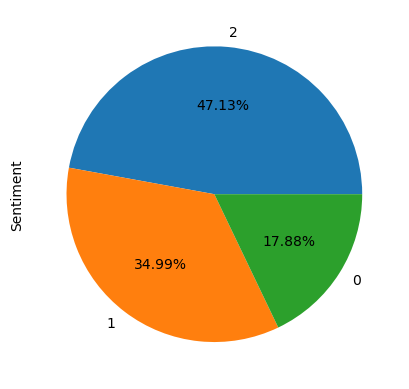

In [39]:
y_train.value_counts().plot(kind="pie",autopct="%.2f%%")

In [40]:
predicted_sentiment=pd.DataFrame(predicted_sentiment)

<Axes: >

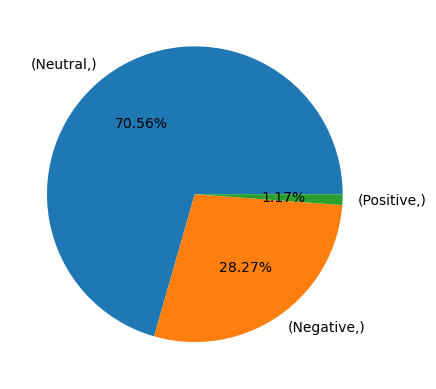

In [41]:
predicted_sentiment.value_counts().plot(kind="pie",autopct="%.2f%%")

In [42]:
predicted_sentiment.value_counts()

Neutral     2164
Negative     867
Positive      36
dtype: int64